In [45]:
import numpy as np
import pandas as pd
data = pd.read_csv('c:\\data\\advertising.csv', index_col = 0)
data

,TV,Weibo,WeChat,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


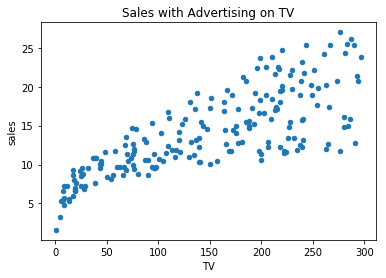

In [46]:
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

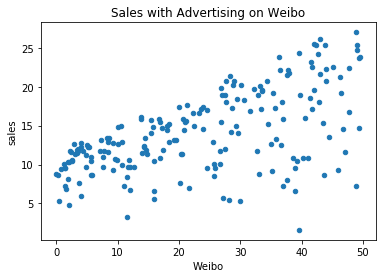

In [47]:
data.plot(kind='scatter',x='Weibo',y='Sales',title='Sales with Advertising on Weibo')
plt.xlabel("Weibo")
plt.ylabel("sales")
plt.show()

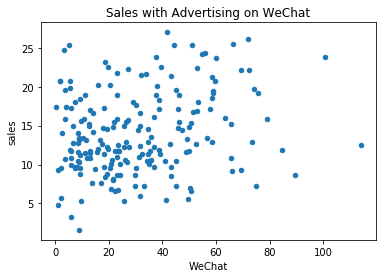

In [48]:
data.plot(kind='scatter',x='WeChat',y='Sales',title='Sales with Advertising on WeChat')
plt.xlabel("WeChat")
plt.ylabel("sales")
plt.show()

In [49]:
X = data.iloc[:,0:3].values.astype(float)
y = data.iloc[:,3].values.astype(float)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  
linreg.fit(X, y)
linreg.intercept_, linreg.coef_

(2.9388893694594067, array([ 0.04576465,  0.18853002, -0.00103749]))

In [50]:
from sklearn.externals import joblib
joblib.dump(linreg, 'linreg.pkl')

['linreg.pkl']

In [51]:
import numpy as np
load_linreg = joblib.load('linreg.pkl')  
new_X = np.array([[130.1,87.8,69.2]])
print("6月广告投入：",new_X)
print("预期销售：",load_linreg.predict(new_X) )

6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


In [52]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.35, random_state=1)

In [53]:
linregTr = LinearRegression() 
linregTr.fit(X_train, y_train)
linregTr.intercept_, linregTr.coef_

(2.9324713466040873, array([0.04608839, 0.18047646, 0.00411699]))

In [61]:
from sklearn import metrics
y_train_pred = linregTr.predict(X_train)
y_test_pred = linregTr.predict(X_test)
train_err = metrics.mean_squared_error(y_train, y_train_pred) 
test_err = metrics.mean_squared_error(y_test, y_test_pred) 
'The mean squar error of train and test are: {:.2f}, {:.2f}'.format(train_err, test_err) 

'The mean squar error of train and test are: 3.06, 2.32'

In [55]:
predict_score =linregTr.score(X_test,y_test)
'The decision coeficient is:{:.2f} '.format(predict_score) 

'The decision coeficient is:0.91 '

In [56]:
predict_score1 =linreg.score(X_test,y_test)
'The decision coeficient of model trained with all is: {:.2f} '.format(predict_score1) 

'The decision coeficient of model trained with all is: 0.92 '

In [57]:
y_test_pred1 = linreg.predict(X_test)
test_err1 = metrics.mean_squared_error(y_test, y_test_pred1) 
'The mean squar error of test with all: {:.2f}'.format(test_err1) 

'The mean squar error of test with all: 2.23'

In [67]:
X1 = data.iloc[0:100,0:3].values.astype(float)
y1 = data.iloc[0:100,3].values.astype(float)
from sklearn.linear_model import LinearRegression
linregHalf = LinearRegression()  
linregHalf.fit(X1, y1)
linregHalf.intercept_, linregHalf.coef_

(3.3497853923471954, array([ 0.04551295,  0.19208846, -0.01066575]))

In [68]:
from sklearn.externals import joblib
joblib.dump(linreg, 'linregHalf.pkl')

['linregHalf.pkl']

In [69]:
import numpy as np
load_linregHalf = joblib.load('linregHalf.pkl')  
new_X1= np.array([[130.1,87.8,69.2]])
print("6月广告投入：",new_X1)
print("预期销售：",load_linregHalf.predict(new_X1) )

6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


In [70]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.35, random_state=1)

In [71]:
linregHalf = LinearRegression() 
linregHalf.fit(X_train, y_train)
linregHalf.intercept_, linregHalf.coef_

(2.9324713466040873, array([0.04608839, 0.18047646, 0.00411699]))

In [75]:
predict_score1 =linregHalf.score(X_test,y_test)
'The decision coeficient of model trained with all is: {:.2f} '.format(predict_score1) 

'The decision coeficient of model trained with all is: 0.91 '

In [76]:
y_test_pred1 = linregHalf.predict(X_test)
test_err1 = metrics.mean_squared_error(y_test, y_test_pred1) 
'The mean squar error of test with all: {:.2f}'.format(test_err1) 

'The mean squar error of test with all: 2.32'